In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
#import dataset
df=pd.read_csv('bikes.csv',parse_dates=["date"])

In [44]:
#shape
df.shape

(191, 5)

datasets contain 191 rows and 5 columns

In [45]:
df.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [47]:
# from dates we can get mothly ,daily,yearly average counts of bikes which can help in data analysis
df1=pd.DataFrame()
df1["month"]=df["date"].dt.month_name()
df1["year"]=df["date"].dt.year
df1["day"]=df["date"].dt.day_name()
df1["count"]=df["count"]
df1.head()

,month,year,day,count
0,January,2011,Monday,120.0
1,January,2011,Tuesday,108.0
2,January,2011,Wednesday,82.0
3,January,2011,Thursday,88.0
4,January,2011,Friday,148.0


In [48]:
#Checking the total number of distict year
df1["year"].drop_duplicates()

0    2011
Name: year, dtype: int64

In [49]:
#making one more column which tell whether it is weekday or weekend
import numpy as np
df1["type_of_day"]=np.where((df1["day"]=="Sunday")|(df1["day"]=="Saturday"),"weekend","weeekday")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
date           191 non-null object
temperature    191 non-null float64
humidity       191 non-null float64
windspeed      191 non-null float64
count          191 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.5+ KB


In [7]:
#check missing values
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

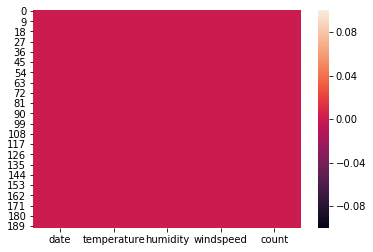

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


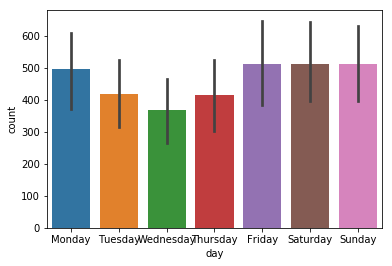

In [52]:
sns.barplot(y='count',x='day',data=df1)

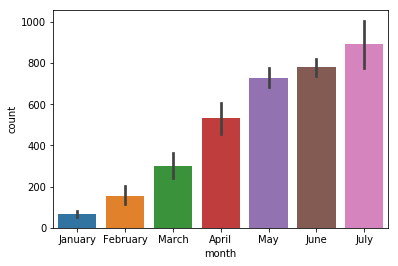

In [53]:
sns.barplot(y='count',x='month',data=df1)

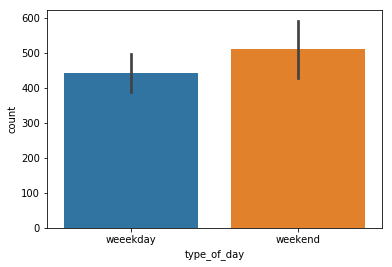

In [55]:
sns.barplot(y='count',x='type_of_day',data=df1)

# Build model

In [57]:
#split the data 
x=df.drop(['count','date'],axis=1)
y=df['count']

In [58]:
#scaling the imput variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)



In [59]:
x.shape,y.shape

((191, 3), (191,))

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
max_f=0
rs=0
for r_state in range(42,101):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=r_state)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tmp=r2_score(y_pred,y_test)
    ("random_state",r_state,"r2_score",tmp)
    if tmp>max_f:
        max_f=tmp
        rs=r_state
print("maximum r2_score ",rs,"it is",max_f)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=rs)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
    

maximum r2_score  88 it is 0.8931885830323335
mean_squared_error 9086.790413479404
mean_absolute_error 78.65096112215261


In [70]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lr, 'bikes_linear_reg.pkl')   

['bikes_linear_reg.pkl']